# Predicting Income With Random Forests

This is a project from the [Codecademy](https://www.codecademy.com/learn) Data Science Career Path.

The dataset used is a census income dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census%20income). 

The objective of this project is to predict whether an individual has an income greater or less than $50,000 based on features such as race, sex, occupation, marital-status, etc.

Let's start by importing our dataset and taking a look!

In [1]:
import pandas as pd

income = pd.read_csv("income.csv")
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
income.shape

(32561, 15)

So it looks like we have our target attribute and 14 features for 32,561 instances. Some of these appear to be continuous number, while some are categorical. We can look at the documentation of the dataset on the UCI Machine Learning Reposity page to learn more:

* __age__: continuous.
* __workclass__: 
    * Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: 
    * Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: 
    * Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: 
    * Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: 
    * Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: 
    * White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: 
    * Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: 
    * United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




Trying to access a particular columns we get a KeyError:

In [3]:
income["workclass"]

KeyError: 'workclass'

It appears that there is some whitespace in some of the columns that ought to be removed. One way to correct this is to use the `rename` method.

In [4]:
income.rename(columns=lambda x: x.strip(), inplace=True)
income[["workclass"]].head()

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private


That seems to have worked!

Now we want to prepare our data for our random forest by splitting the target attribute from the features. We will start with our features being: `age`, `capital-gain`, `capital-loss`, `hours-per-week`, and `sex`.

In [5]:
targets = income[["income"]].copy()
features = income[["age", "capital-gain", "capital-loss", "hours-per-week", "sex"]].copy()
features.head()


,age,capital-gain,capital-loss,hours-per-week,sex
0,39,2174,0,40,Male
1,50,0,0,13,Male
2,38,0,0,40,Male
3,53,0,0,40,Male
4,28,0,0,40,Female


There is a problem with this data before we can use it in a random forest. The `sex` column has values of "Male" or "Female". We need all values to be numerical.

We can correct this by converting "Male" to 0 and "Female" to 1.

Note though that the values in the `sex` column are actually " Male" and " Feamle" (with a leading space).

In [6]:
features['sex'] = features.loc[:,'sex'].replace([' Male', ' Female'], [0, 1])
features.head()

,age,capital-gain,capital-loss,hours-per-week,sex
0,39,2174,0,40,0
1,50,0,0,13,0
2,38,0,0,40,0
3,53,0,0,40,0
4,28,0,0,40,1


We now can split out features and targets into training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=1)

Now we are ready to build our random forest. We will use the default number of trees, or estimators, of 100.

In [8]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(train_features, train_targets.values.ravel())


RandomForestClassifier(random_state=1)

Now let's see how this model performs on the testing set.

In [9]:
score = forest.score(test_features, test_targets)
print(f"The accuracy of the model on the testing set is: {score:.2%}")

The accuracy of the model on the testing set is: 82.73%


Now let's try adding some more features to our model to see if we can improve its accuracy.

It would seem that some relevant features for this model could be `native-country`,  `occupation`, `race`, and `education`. However, all of these are categorical values. To help us decide how to encode these numerically, let's take a look at the differnent values and how many times each is represented in the data.

First, let's look at `native-country`.

In [10]:
income['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Since this dataset is heavily biased towards those born in the United States, it may be useful to encode those from the United States with 1 and all others with 0.

Now let's look at the value counts for `occupation`.

In [11]:
income['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

This being a more balanced dataset, we can make a one-hot encoding for each value.

Now for `race`.

In [12]:
income['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

This is still heavily biased towards individuals classified as `White`, but not quite as heavily as the `native-country` column was towards those from the United States. I will elect to still perform one-hot encoding on this feature.

Finally, let's look at `education`.

In [13]:
income['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Again with this being a more balanced dataset, I could still use one-hot encoding, but it may make more sense to do things a bit differently since these values aren't necessarily distinct. For example, it may not make much sense to give an individaul a 0 for the preschool column if they finished 9th grade, since we know there is a sequential order to much of the educational process. Things get a bit tricker when comparing assoc-voc vs assoc-acdm vs some-college, etc. I will suggest the following classification scheme:
* Completed up through 9th grade
    * 0 will be assigned to the following: `Preschool`, `1st-4th`, `5th-6th`, `7th-8th`, `9th`
    * 1 will be assigned otherwise
* Completed HS
    * 0 will be assigned to those with a 0 for "Completed up through 9th grade" as well as `10th`, `11th`, and `12th`
    * 1 will be assigned otherwise
* Completed a post-secondary degree
    * 1 will be assigned to `Bachelors`, `Masters`, `Assoc-voc`, `Assoc-acdm`, `Prof-school`, and `Doctorate`
    * 0 will be assigned otherwise.


Now I will proceed with implementing my suggested encoding schemes.

In [14]:
native_country = income["native-country"].str.strip()
country = pd.DataFrame()
country['from_US'] = native_country.apply(lambda x: 1 if x == "United-States" else 0)

occupation = pd.get_dummies(income["occupation"], prefix="occupation")

race = pd.get_dummies(income["race"], prefix="race")

education = income['education'].str.strip()
schooling = pd.DataFrame()
schooling['completed_9th_or_less'] = education.apply(lambda x: 0 if x in \
            ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th'] else 1)
schooling['completed_HS'] = education.apply(lambda x: 0 if x in \
        ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'] else 1)
schooling['completed_post_secondary'] = education.apply(lambda x: 1 if x in ['Bachelors', 'Masters', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Doctorate'] else 0)


Now we will combine these new features with the previous ones to create a new set of features.

In [15]:
features = pd.concat([features, country, occupation, race, schooling], axis=1)
features.head()

,age,capital-gain,capital-loss,hours-per-week,sex,from_US,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,completed_9th_or_less,completed_HS,completed_post_secondary
0,39,2174,0,40,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
1,50,0,0,13,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,38,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,53,0,0,40,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,28,0,0,40,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1


Next, we can split the new features along with the targets into training and testing sets. And then train a new model.

In [78]:
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=1)

forest = RandomForestClassifier(random_state=1)
forest.fit(train_features, train_targets.values.ravel())

RandomForestClassifier(random_state=1)

Finally, to see how adding these new features helped or hurt our model performance.

In [79]:
score = forest.score(test_features, test_targets)
print(f"The accuracy of the model on the testing set is: {score:.2%}")


The accuracy of the model on the testing set is: 82.74%


So adding all of these new features didn't actually seem to improve the performance at all! It's important to learn that adding features doens't alway improve your model. It may require you to tune the hyperparameters of the model more carefully to get improvment. Or the new features may be largely redundent. 

We can take a look at the importance of each feature through one of the attributes of `forest`.

In [81]:
forest.feature_importances_

array([3.36755875e-01, 1.61648833e-01, 5.91206977e-02, 1.65022064e-01,
       4.68370536e-02, 1.42417247e-02, 3.90041029e-03, 6.81348241e-03,
       5.31552009e-05, 6.53674410e-03, 2.81791217e-02, 4.67809835e-03,
       4.22168964e-03, 4.13055714e-03, 1.03607451e-02, 2.47285656e-04,
       2.00675478e-02, 4.42624841e-03, 7.55574728e-03, 6.05330978e-03,
       4.74854759e-03, 2.06463333e-03, 4.28489072e-03, 5.93709220e-03,
       1.44136019e-03, 7.84306314e-03, 3.97913276e-03, 1.48590215e-02,
       6.39918684e-02])

Additioanally, we could see how much the model accuracy is impacted by removing each individual feature. This could be refered to as "marginal accuracy" since it is not testing the predictive power of each feature by itself, but how impactful adding that feature (or taking it away) from the current collection is.

In this case we can see the model score on the test set for random forests trained on vaious subsets of the collection of features. Each time through the loop we will remove one feature, train and test the model on the remaining features and record how much the accuracy decreased or increased when this feature is added back in. Positive values imply that when this feature is added to the collection of features **not** including this one, the model accuracy **increased**.

In [26]:
full_feature_score = score
col_added = []
score_diff = []

for col in features.columns:
    new_features = features.copy()
    new_features.pop(col)
    train_features, test_features, train_targets, test_targets = train_test_split(new_features, targets, random_state=1)
    forest = RandomForestClassifier(random_state=1)
    forest.fit(train_features, train_targets.values.ravel())
    new_score = forest.score(test_features, test_targets)
    col_added.append(col)
    score_diff.append(full_feature_score - new_score)



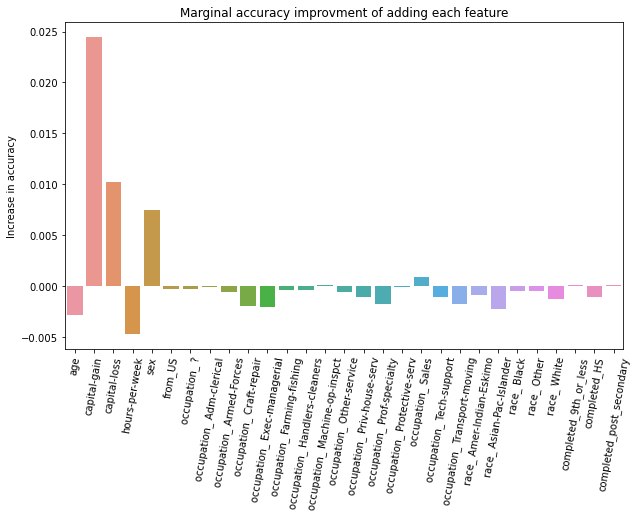

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x=col_added, y=score_diff)
plt.xticks(rotation=80)
ax.set(title="Marginal accuracy improvment of adding each feature", ylabel="Increase in accuracy")
plt.show()

Note that this is all with using largely the default parameters for training the random forest. We can see that `capital_gain`, `capital_loss`, and `sex` had the greatest marginal accuracy improvment when included in the model. Many features seemed to **hinder** the model performance when added. This could be a sign of a model which is overfitting on the training set. It could be valuable to experiment with adjusting hyperparameters such as max_depth and max_leaf_nodes.

But remember, when experimenting with hyperparameters, a validation set should be used so as not to simply stumble upon a collection that performs well on the testing set, but to hopefully build a model that genuinely gernalizes better than another.